In [1]:
import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")

# Plib imports for the strategy
import Plib.Options.Strangle as o
import Plib.Options.Models as opt
import Plib.DataFarm.IEXdata as datafarm1
import Plib.DataFarm.Orats as datafarm2
import Plib.Plotting.Plots as pl1
import Plib.Volatility.Estimation as pl2
import Plib.Utils.Tools as tls

#import warnings
#warnings.filterwarnings("ignore")
import math as m
import pandas as pd
from IPython.display import clear_output

%matplotlib inline

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


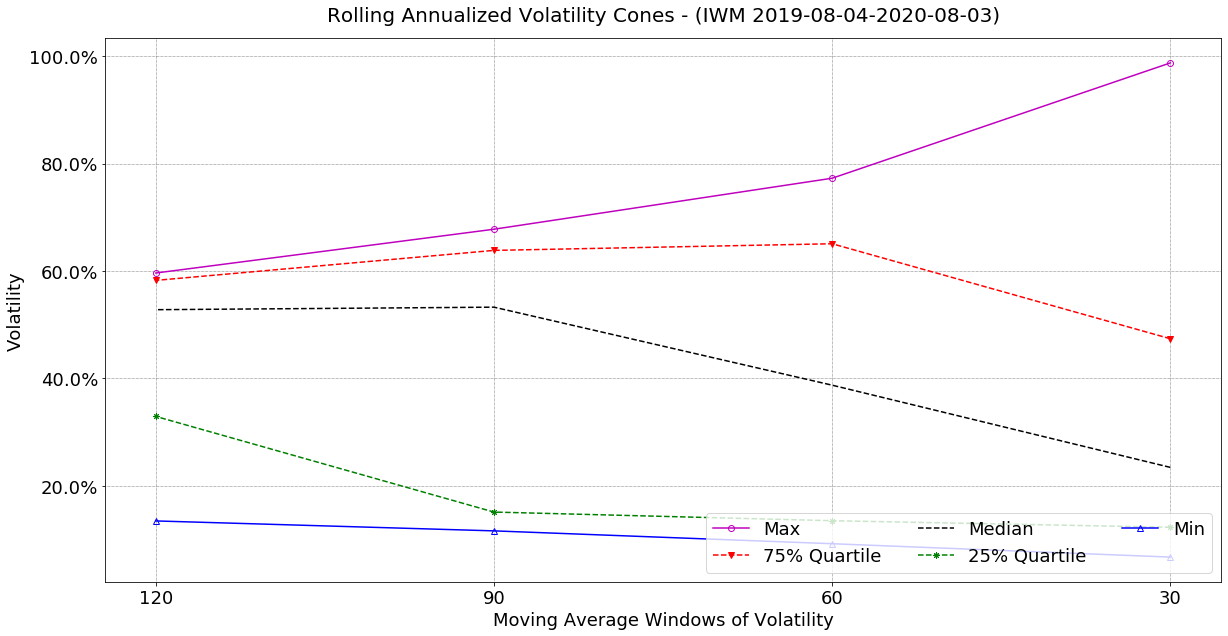

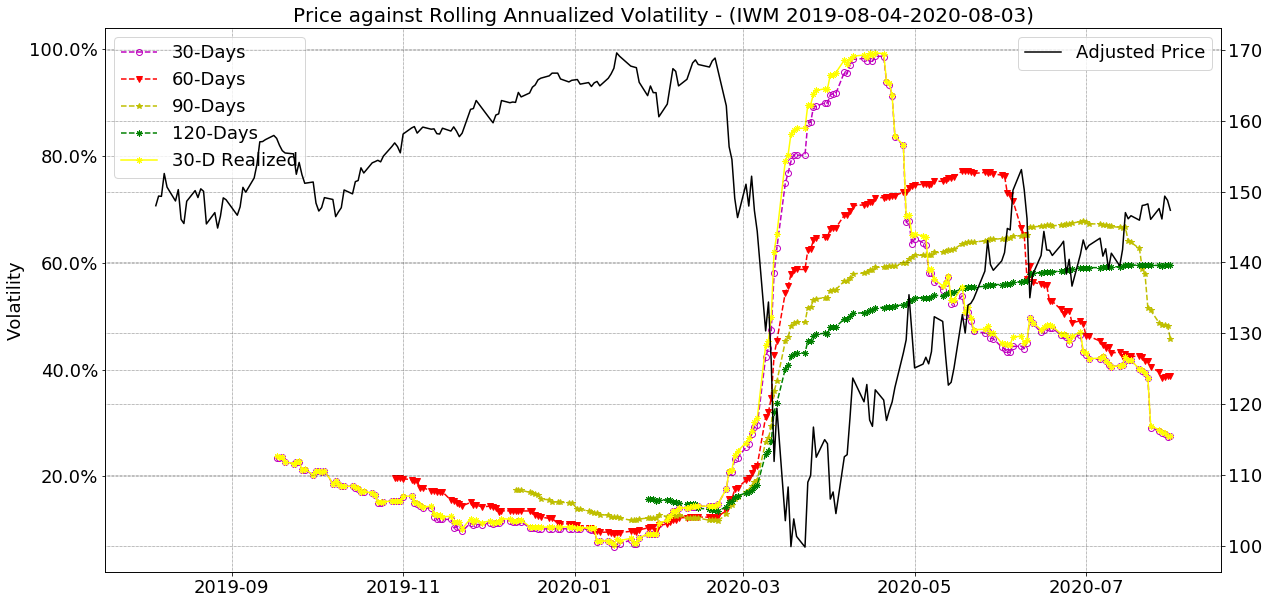

Current Price and Estimated std: 147.36 0.0594
Price Range in one standard deviation: 156.1132 138.6068


In [2]:
orats=True

symbol = 'IWM'

eval_data = '2020-08-03'
udata=eval_data
dt_start,dt_end=tls.getDates(offset=-365,today_date=udata)

threshold=0.08
iRate=0.01
desc = symbol + " " + dt_start + "-" + udata


prices = pd.DataFrame(datafarm1.get_eod_data(symbol, dt_start, dt_end).interpolate())
cones, vols = pl2.volconesSV(prices)
#realized, roll30, roll, roll60, roll120
mysigma=m.sqrt(vols[0].mean()*100)/100
pl2.plotDiagCones(cones,vols,desc,prices,mysigma)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Underlying Price Measures
                     Values
Mean Price         146.8322
Median Price       149.3200
Daily Avg BB Range  20.6071
Monthly BB MA Mean 146.7695
Monthly 50 MA Mean 146.7466
Last Price         147.3600


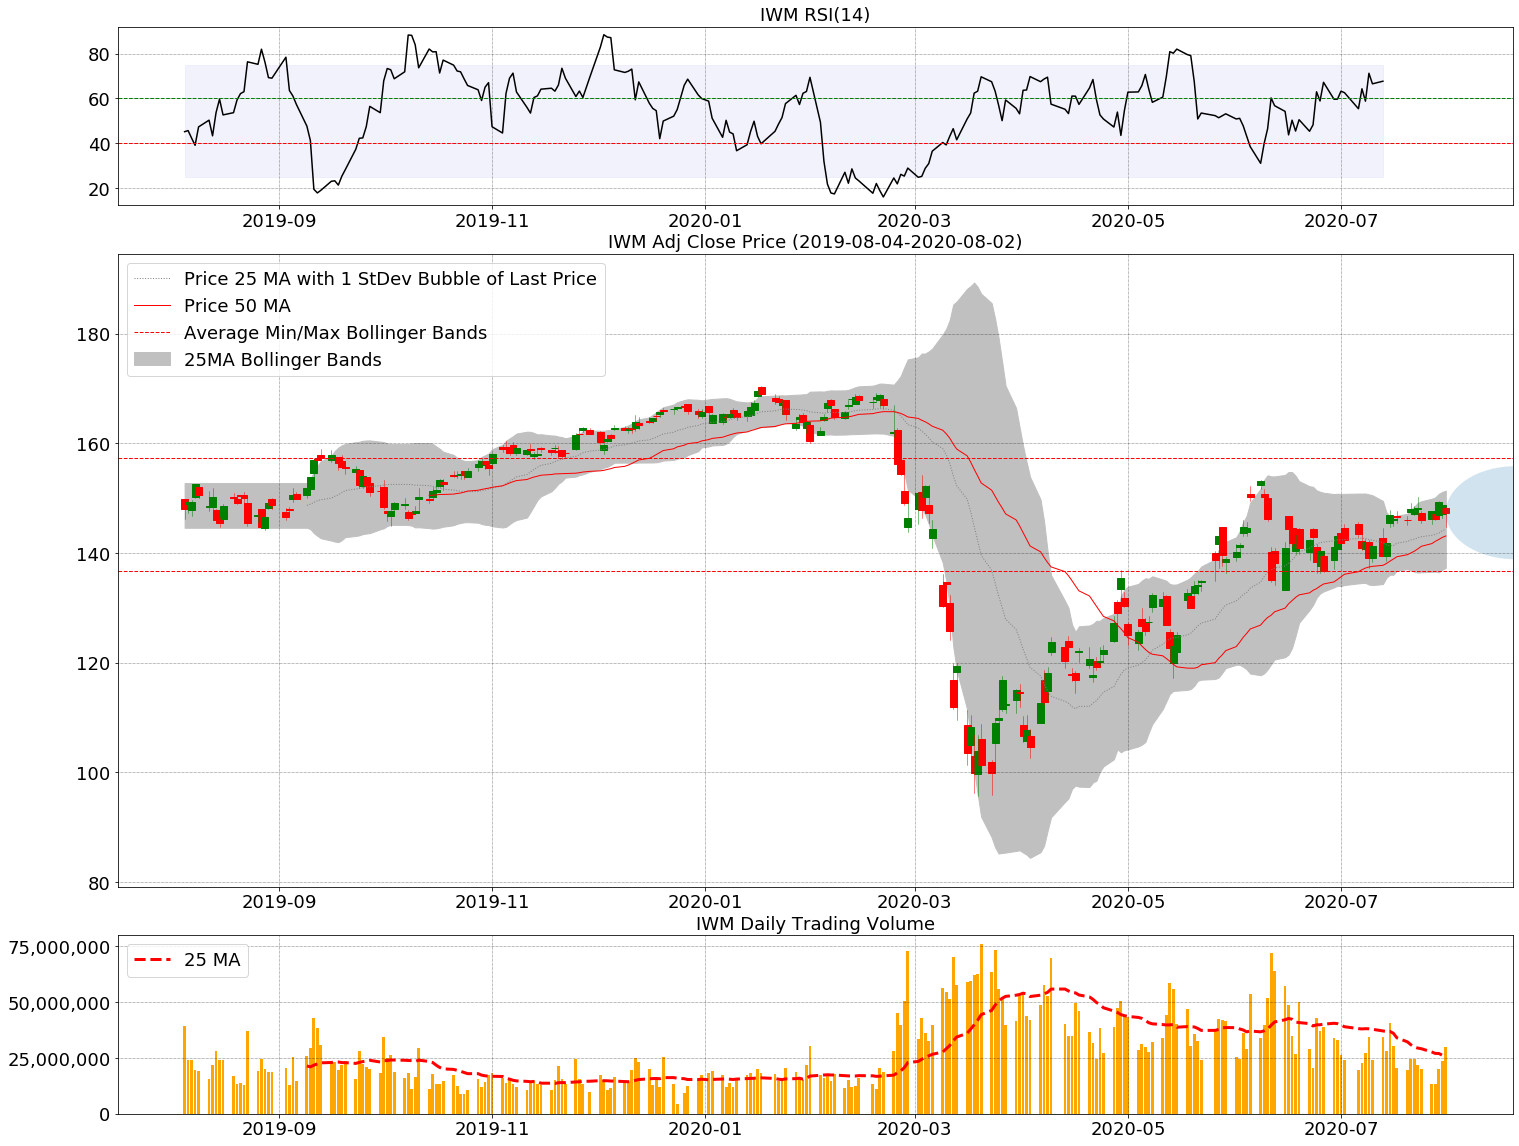

In [3]:
pl1.plotUnderlyingStudy(symbol,dt_start,dt_end,prices,sigma=mysigma)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


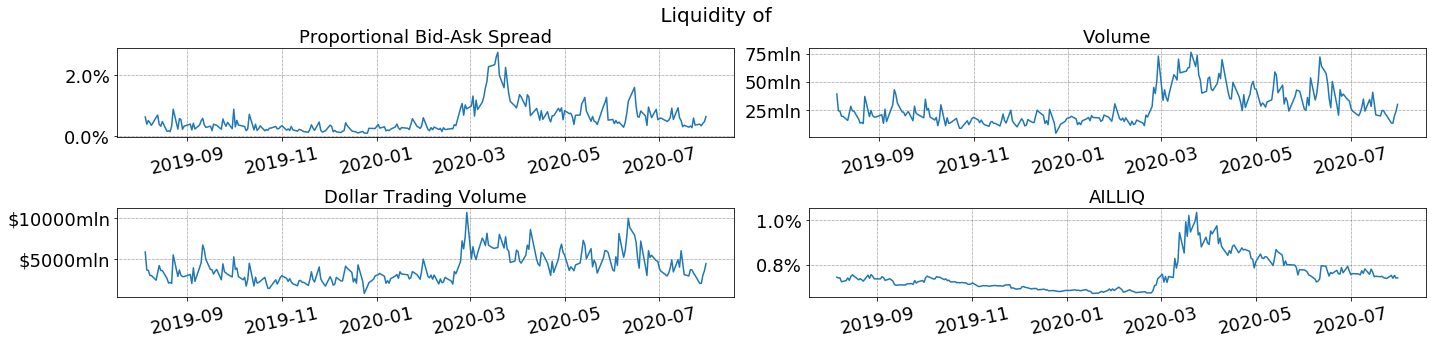

Stock Liquidity Measures
                                          Mean             Median
Proportional Bid-Ask Spread             0.0056             0.0039
Volume                         27,939,190.6016    23,570,007.0000
Dollar Trading Volume       3,905,158,005.3413 3,449,264,385.9564
AILLIQ                                  0.0069             0.0067


In [4]:
df2=pl2.printSecurityLiqStats(prices)

In [5]:
## Strangle 
# A strangle is a position that is a neutral strategy that profits when the stock stays between 
# the short strikes as time passes, and implied volatilitydecreases; it is an undefined risk option strategy.
# Short strangle: Sell OTM Call Sell OTM Put
# Long strangle: Buy OTM Call Sell Buy Put

LongShort=1
u_price=prices.Adjusted_close[len(prices)-1]
#average volatility from cones
myvol=vols[0].mean()
print('Estimated Volatility from Cones: ',myvol)

Estimated Volatility from Cones:  0.3522855925759025


In [6]:
if orats==False:
    #IEXCloud data
    options=datafarm1.getAllOptionChainIEX(symbol,iRate,myvol)
else:
    #ORATS data
    options=datafarm2.getOptionsOrats(udata,symbol,True)

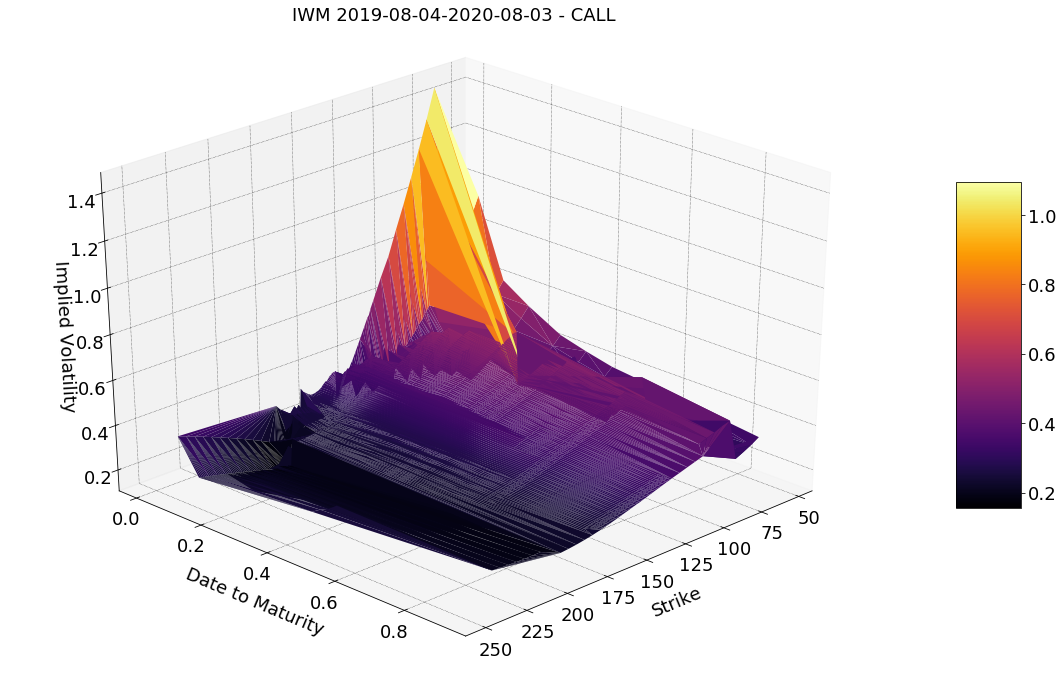

In [7]:
maxdate,void=tls.getDates(offset=+360,today_date=udata)
ret=pl2.plot3DVol(options,maxdate=maxdate,otype='CALL',desc=desc)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


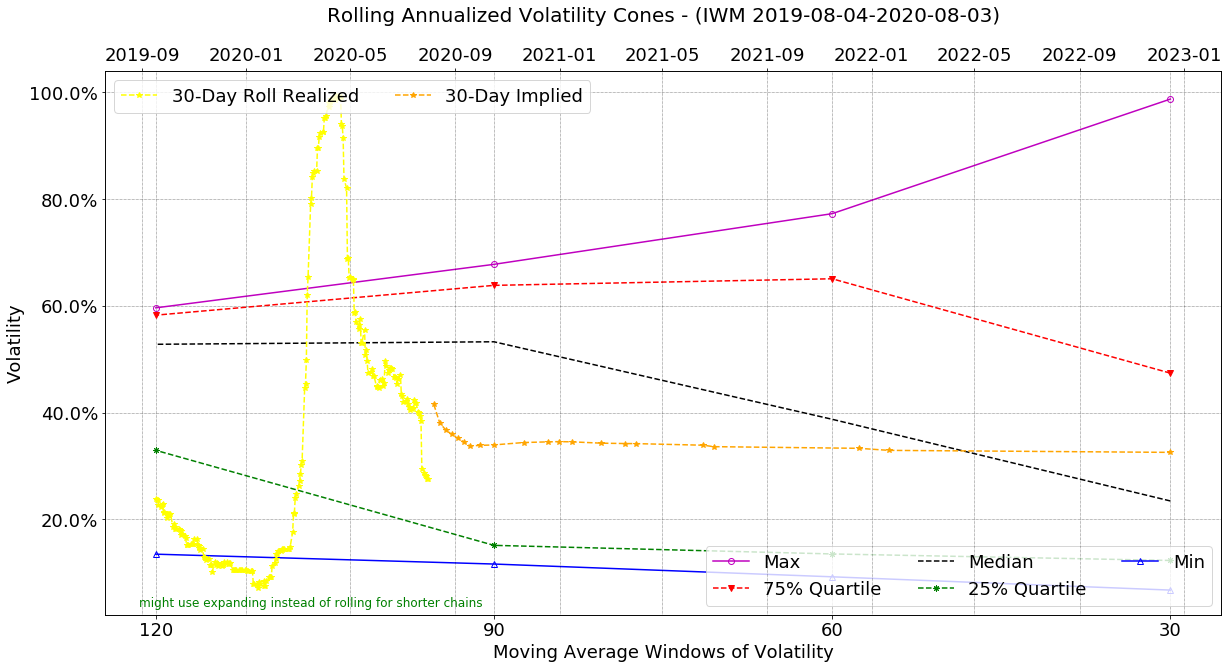

Options IVol Stats (see note in graph, if present)
                             Values
Min 52W Implied Vol (%)       32.55
Max 52W Implied Vol (%)       41.52
Last Implied Vol (%)          41.52
IV Rank (over 252 days)       99.99
IV Perc (over 252 days) (%)  100.00
Current Price                147.36
Estimated Mean iVol (%)       34.78
Min Expected Price 30-Days   140.01
Max Expected Price 30-Days   154.71


In [8]:
iSVol,iVol,optionsATM=pl2.compute30DVol(options,'CALL',dt_start,dt_end,u_price)
pl2.plotVolConesSV(symbol,dt_start,udata,iVol,options,prices)

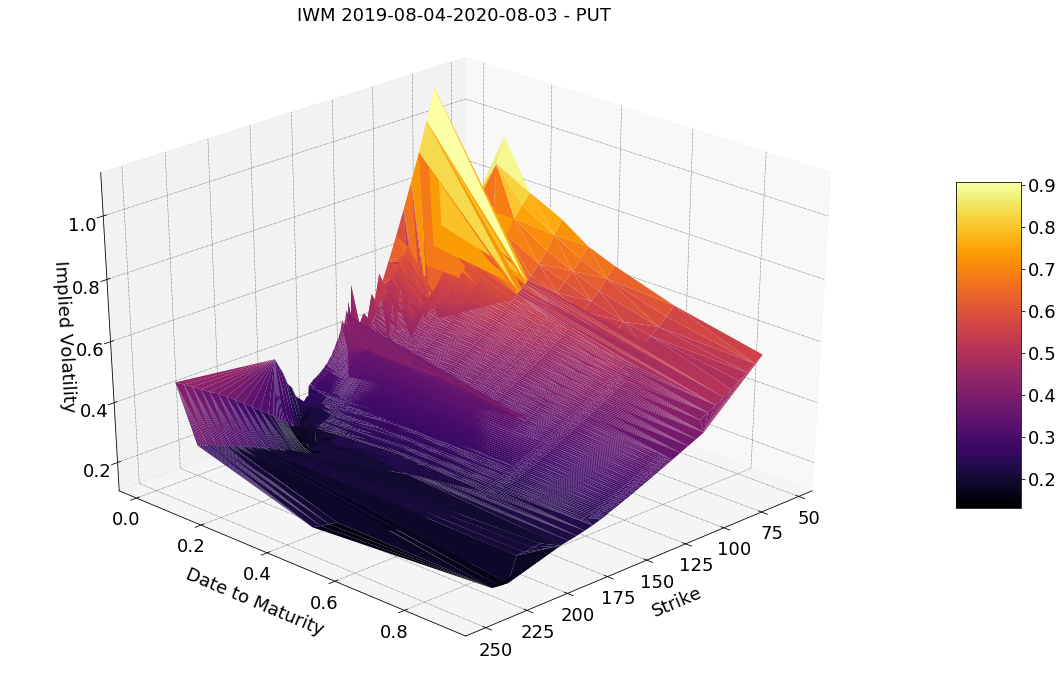

In [9]:
maxdate,void=tls.getDates(offset=+360,today_date=udata)
ret=pl2.plot3DVol(options,maxdate=maxdate,otype='PUT',desc=desc)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


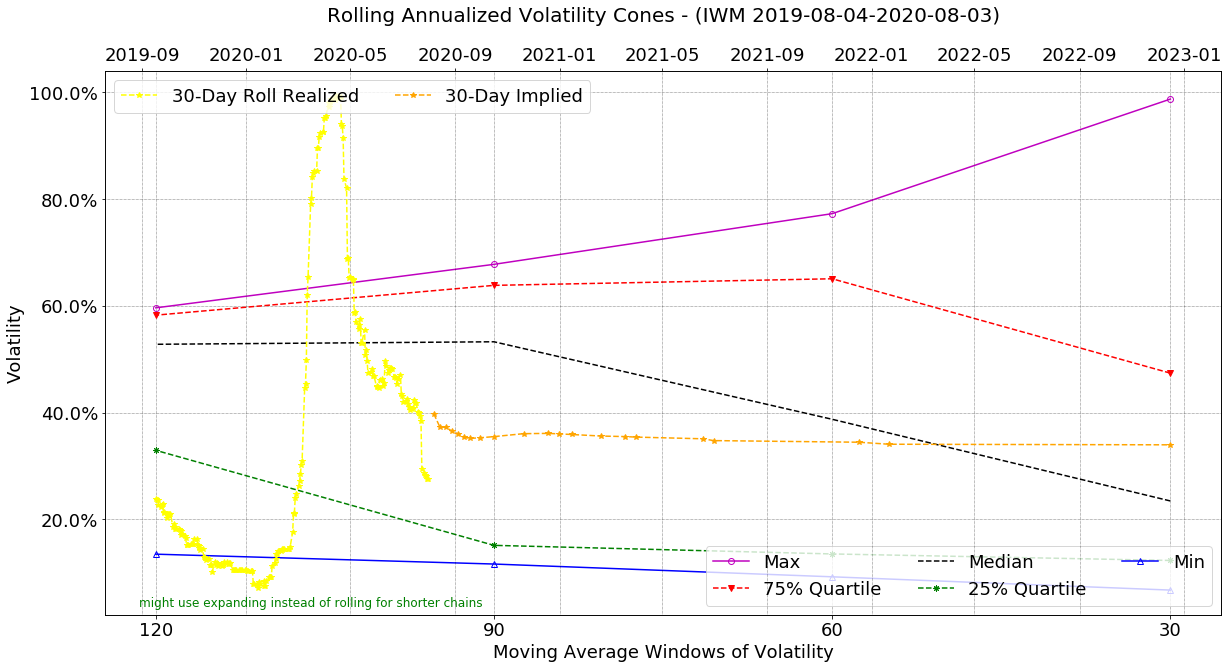

Options IVol Stats (see note in graph, if present)
                             Values
Min 52W Implied Vol (%)       33.96
Max 52W Implied Vol (%)       39.78
Last Implied Vol (%)          39.78
IV Rank (over 252 days)       99.96
IV Perc (over 252 days) (%)  100.00
Current Price                147.36
Estimated Mean iVol (%)       35.77
Min Expected Price 30-Days   139.80
Max Expected Price 30-Days   154.92


In [10]:
iSVol,iVol,optionsATM=pl2.compute30DVol(options,'PUT',dt_start,dt_end,u_price)
pl2.plotVolConesSV(symbol,dt_start,udata,iVol,options,prices)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


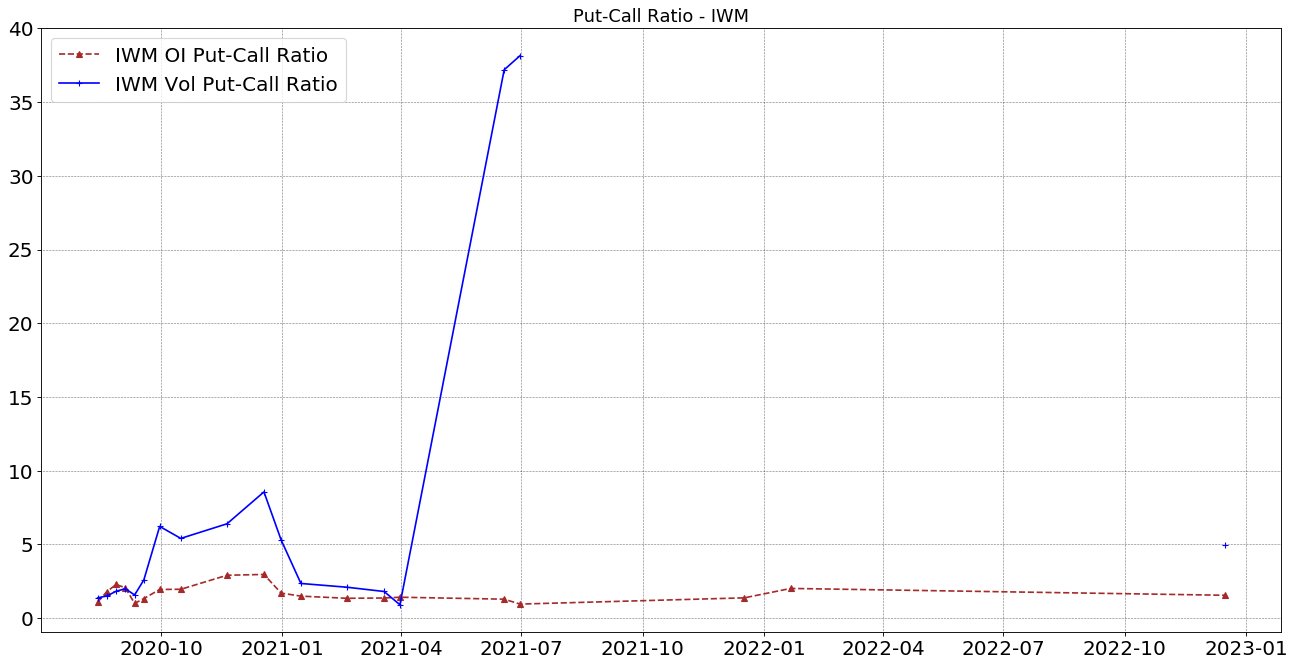

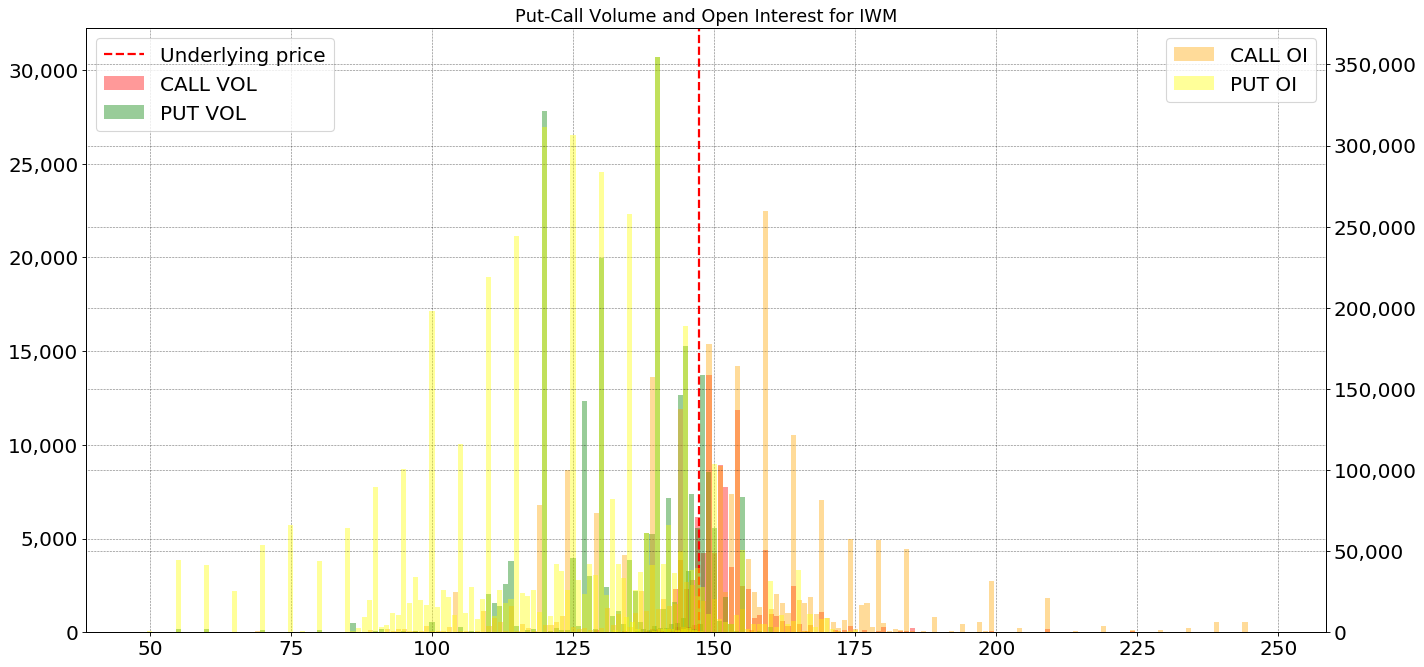

In [11]:
pl2.plotPCRatio(symbol, options,pcr_type='PCR_EQUITY')
pl2.plotPCVolOI(symbol, options,u_price)

/Users/rob/.local/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


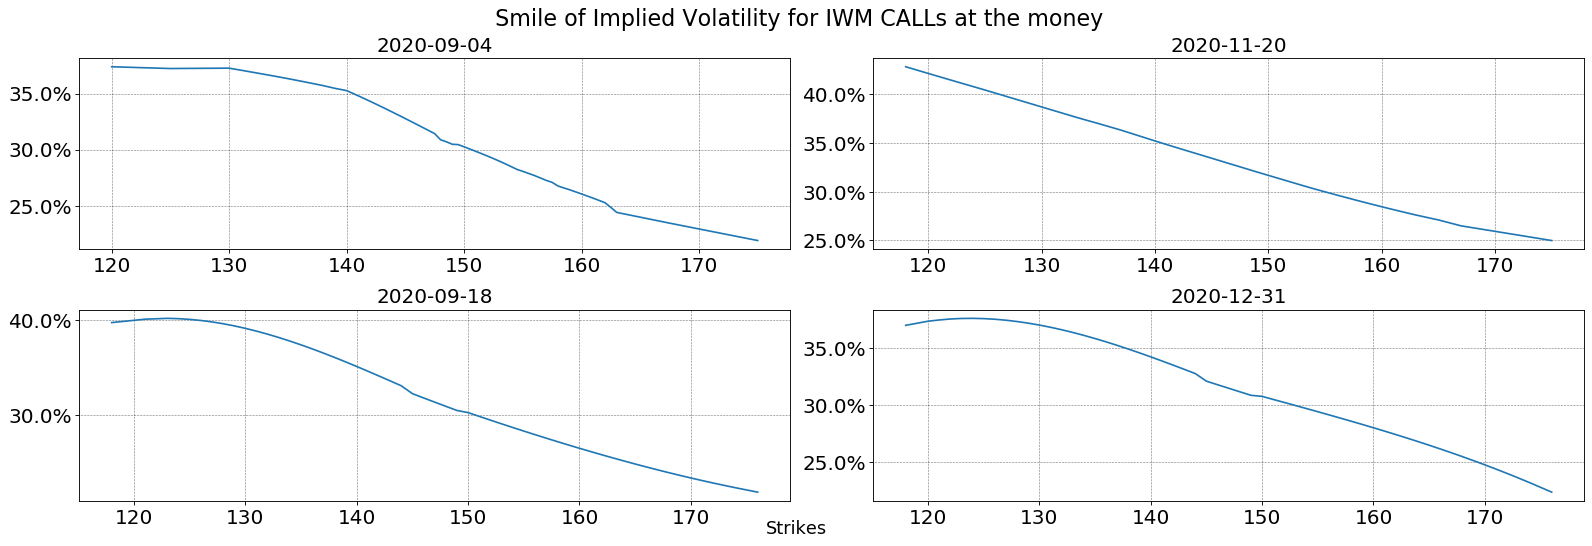

                        Values
Price                   147.36
Mean IV 2020-09-04 (%)   32.13
Mean IV 2020-11-20 (%)   34.06
Mean IV 2020-09-18 (%)   31.15
Mean IV 2020-12-31 (%)   31.82


In [12]:
expdata=['2020-09-04','2020-11-20','2020-09-18','2020-12-31']
pl2.plotSmileEATM('CALL', options, symbol,  expdata,u_price,interp=True)


In [13]:
# Short strangle: Sell OTM Call Sell OTM Put
# Long strangle: Buy OTM Call Sell Buy Put

fbo,co=o.getExpStrangle2(eval_data,u_price,options,0.5*m.sqrt(myvol*100)/100)
fbo.head(20)

EDate1  strike1  strike2
0  2020-09-04   139.00   152.00
1  2020-09-11   139.00   152.00
2  2020-09-18   139.00   152.00
3  2020-09-30   139.00   152.00
4  2020-10-16   139.00   152.00
5  2020-11-20   139.00   152.00
6  2020-12-18   139.00   152.00
7  2020-12-31   139.00   152.00
8  2021-01-15   139.00   152.00
9  2020-09-04   130.00   157.00
10 2020-09-11   130.00   157.00
11 2020-09-18   130.00   157.00
12 2020-09-30   130.00   157.00
13 2020-10-16   130.00   157.00
14 2020-11-20   130.00   157.00
15 2020-12-18   130.00   157.00
16 2020-12-31   130.00   157.00
17 2021-01-15   130.00   157.00

CALLs Liquidity Measures - Mean/Median


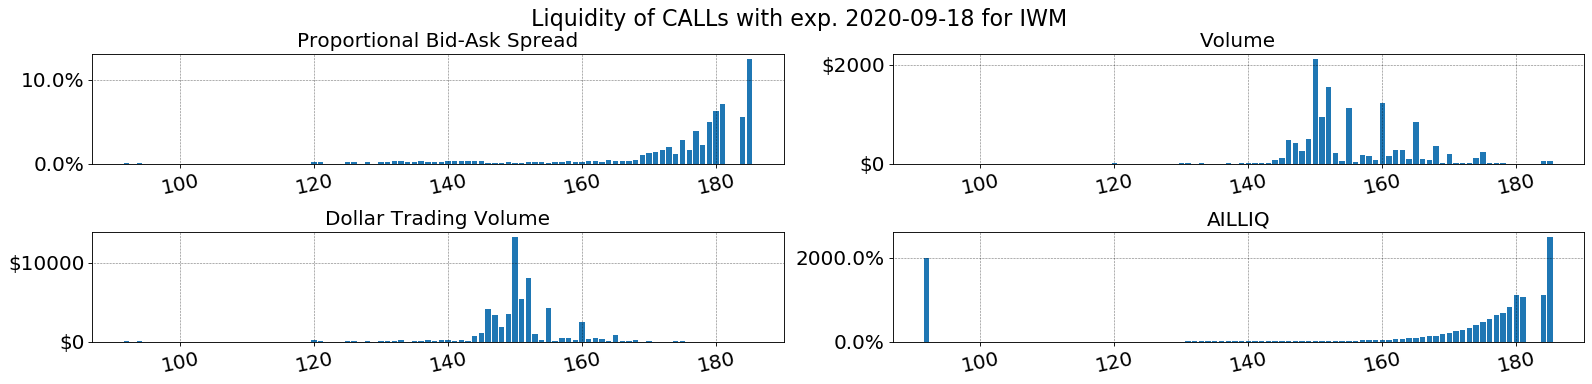

                                Mean  Median
Proportional Bid-Ask Spread   0.0121  0.0045
Volume                      189.0543 10.0000
Dollar Trading Volume       595.8120 50.0750
AILLIQ                        2.6302  0.1755
PUTs Liquidity Measures - Mean/Median


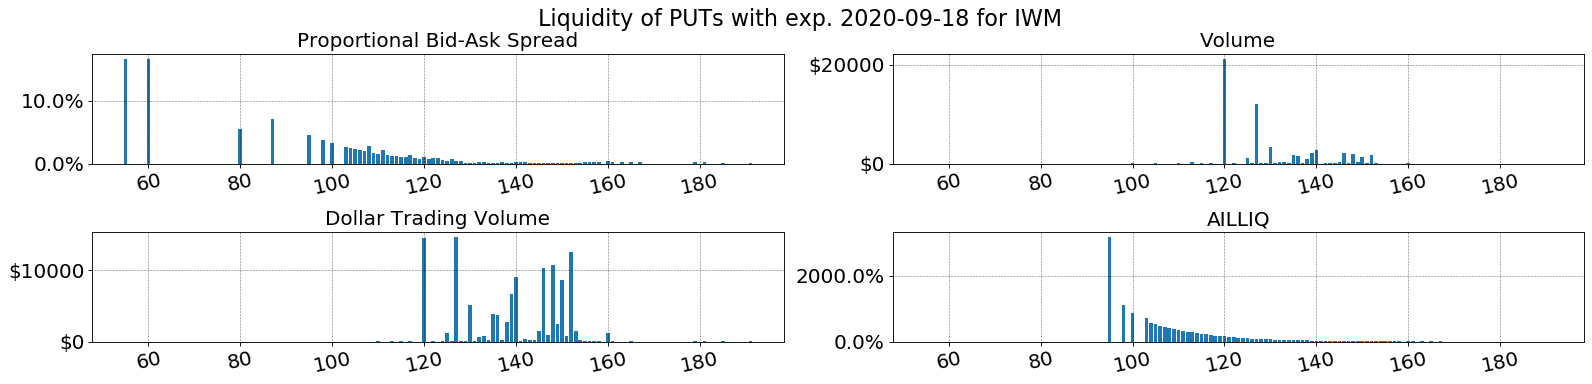

                                Mean  Median
Proportional Bid-Ask Spread   0.0170  0.0050
Volume                      374.3744 18.0000
Dollar Trading Volume       790.2614 37.6250
AILLIQ                        2.2899  0.3651


In [14]:
Expiration_N=2
d1=str(fbo.iloc[Expiration_N][0].date())
df1=pl2.printOptLiqStats(options[options.index==eval_data],'CALL',symbol,d1)
df1=pl2.printOptLiqStats(options[options.index==eval_data],'PUT',symbol,d1)


In [15]:
fb=o.getStrangles(0,co,fbo)
fb.head(10)

expirationDate_x type_x  strike_x  lastPrice_x  impliedVolatility_x  dte_x  \
0       2020-09-04    PUT  139.0000       2.1000               0.3532 0.0877   

  expirationDate_y type_y  strike_y  lastPrice_y  ...  delta_x  gamma_x  \
0       2020-09-04   CALL  152.0000       4.1000  ...   0.7787   0.0191   

   theta_x  vega_x  rho_x  delta_y  gamma_y  theta_y  vega_y  rho_y  
0  -0.0722  0.1290 0.0758   0.4482   0.0311  -0.0787  0.1762 0.0506  

[1 rows x 22 columns]

In [16]:
sLegs=o.getStLegs(0,fb)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/rob/.local/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:215: RuntimeWarning: invalid value encountered in true_divide
  frac=frac, it=it, delta=delta, given_xvals=False)


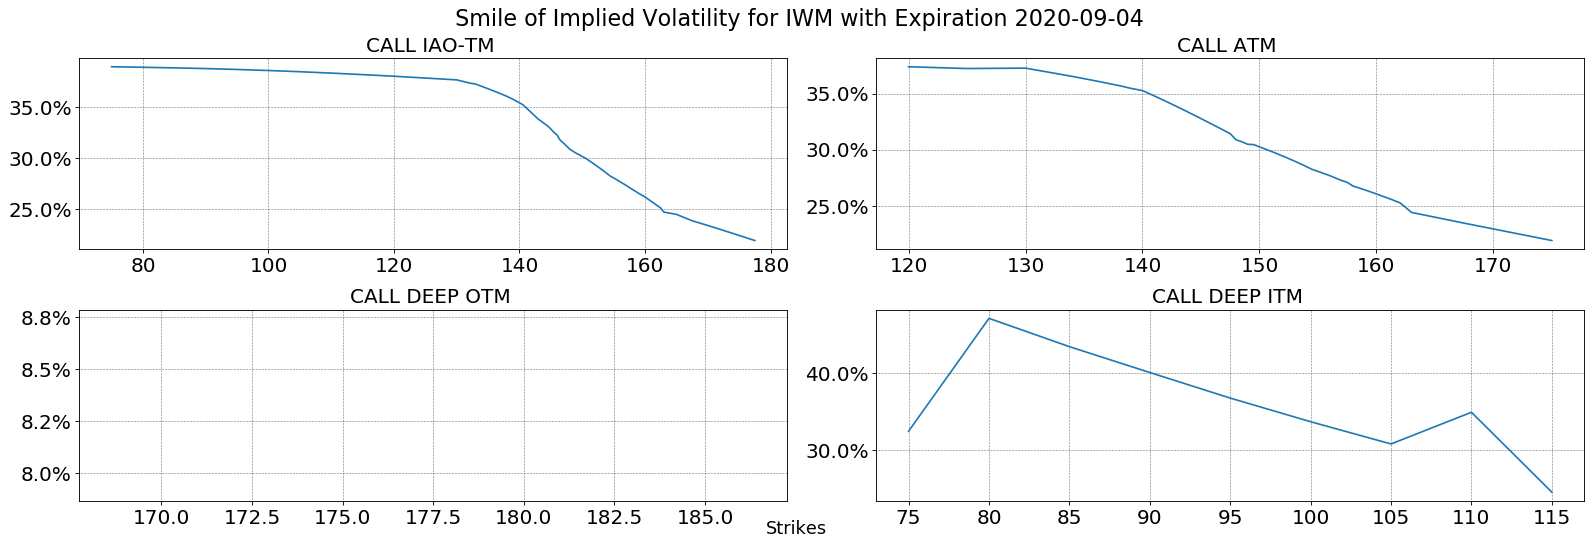

                      Values
Price                 147.36
Mean IV Deep OTM (%)   24.98
Mean IV ATM (%)        31.15
Mean IV IAO-TM (%)     32.18
Mean IV Deep ITM (%)   39.54


/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/rob/.local/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:215: RuntimeWarning: invalid value encountered in true_divide
  frac=frac, it=it, delta=delta, given_xvals=False)


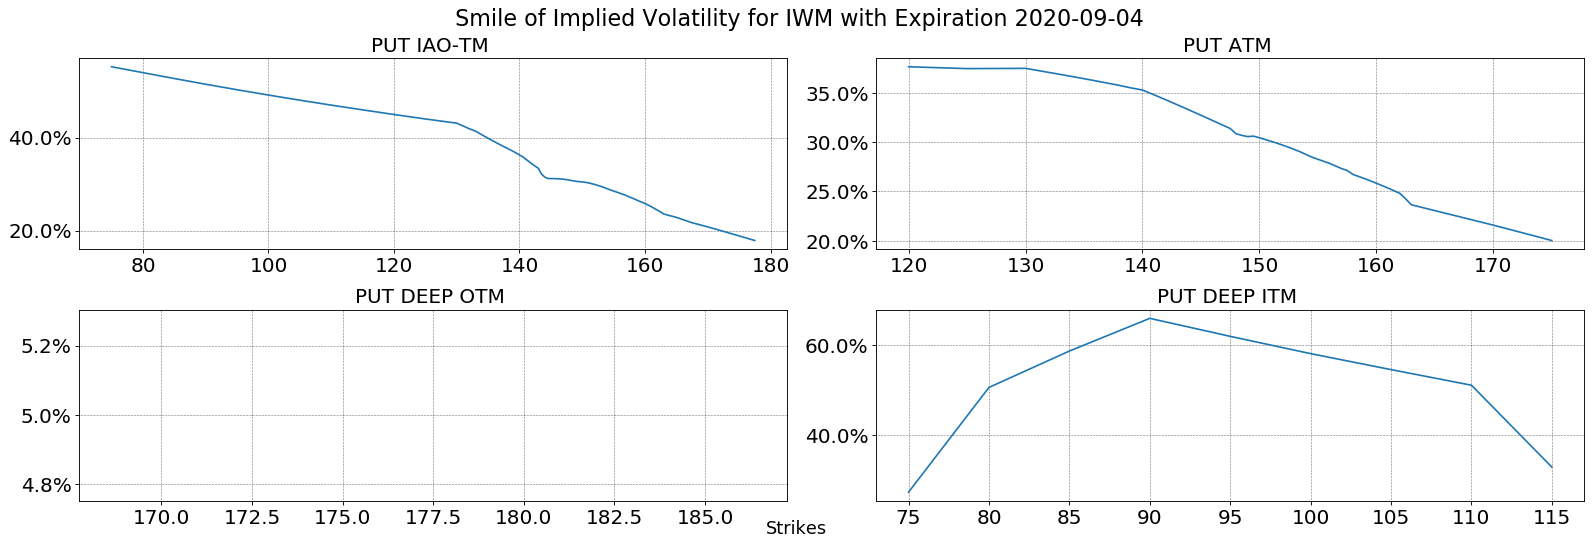

                      Values
Price                 147.36
Mean IV Deep OTM (%)   15.08
Mean IV ATM (%)        30.99
Mean IV IAO-TM (%)     33.93
Mean IV Deep ITM (%)   54.61


In [17]:
pl2.plotSmile('CALL', options, symbol, fb['expirationDate_x'].iloc[0].strftime("%Y-%m-%d"),u_price,interp=True)
pl2.plotSmile('PUT', options, symbol, fb['expirationDate_y'].iloc[0].strftime("%Y-%m-%d"),u_price,interp=True)

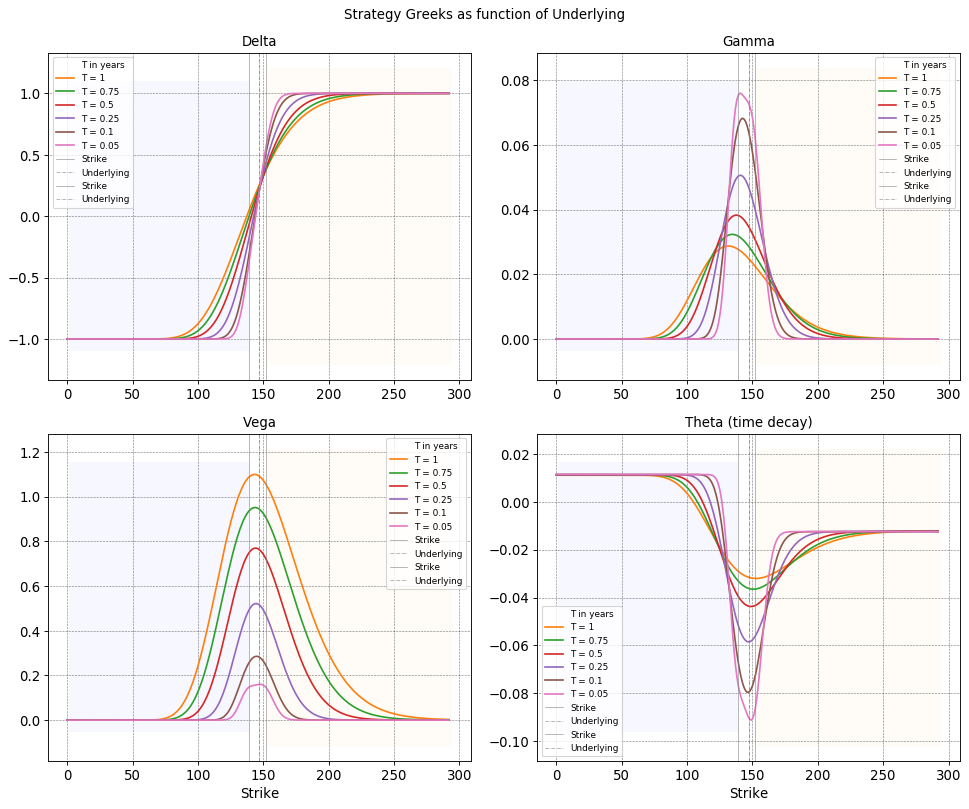

In [18]:
opts_list=o.getSLegs2(0,fb,sigma=0.2,ir=0.03)
opt.plotGreeks2(int(u_price), opts_list,title='Strategy Greeks as function of Underlying',fs=(12,10))

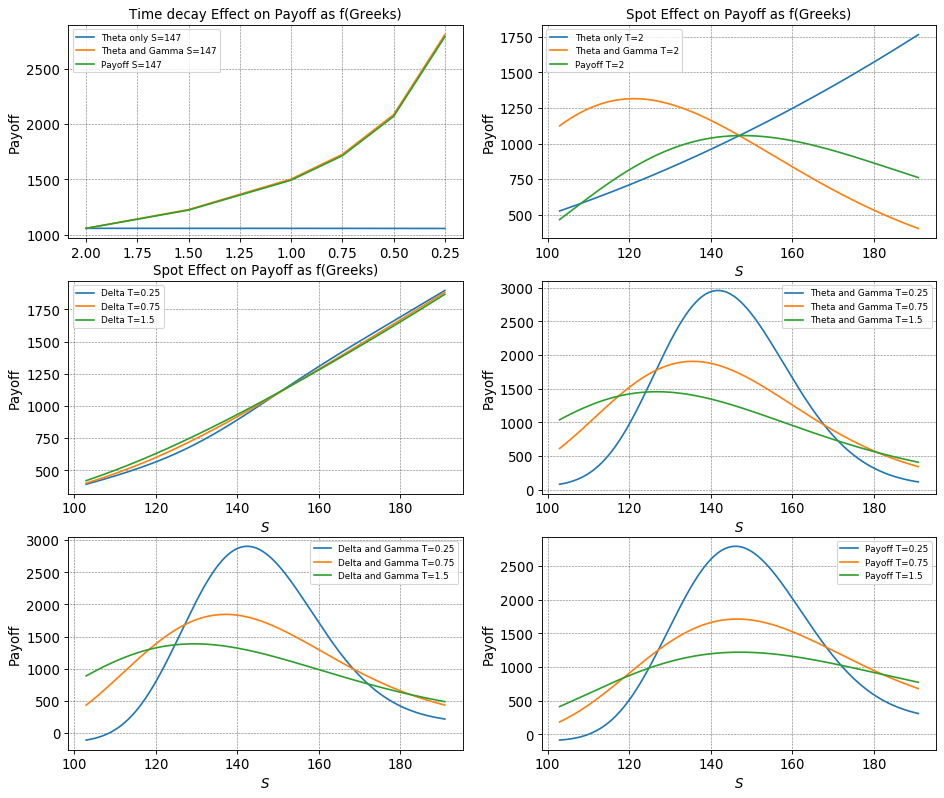

In [19]:
opt.plotGreeksPayoff2(int(u_price), opts_list, LongShort=1, r=0.03, prange=[0.30,0.30],step=0.25,fs=(14,12))

In [20]:
opt.makeDGHTable(o.getSLegs3(0,fb, int(u_price), ir=0.03), prange=int(u_price*(myvol**2))/2)

Hedging requires  -0.5399 units of underlying
Hedging requires  0.7169 units of another derivative and  79.7891 cash


/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


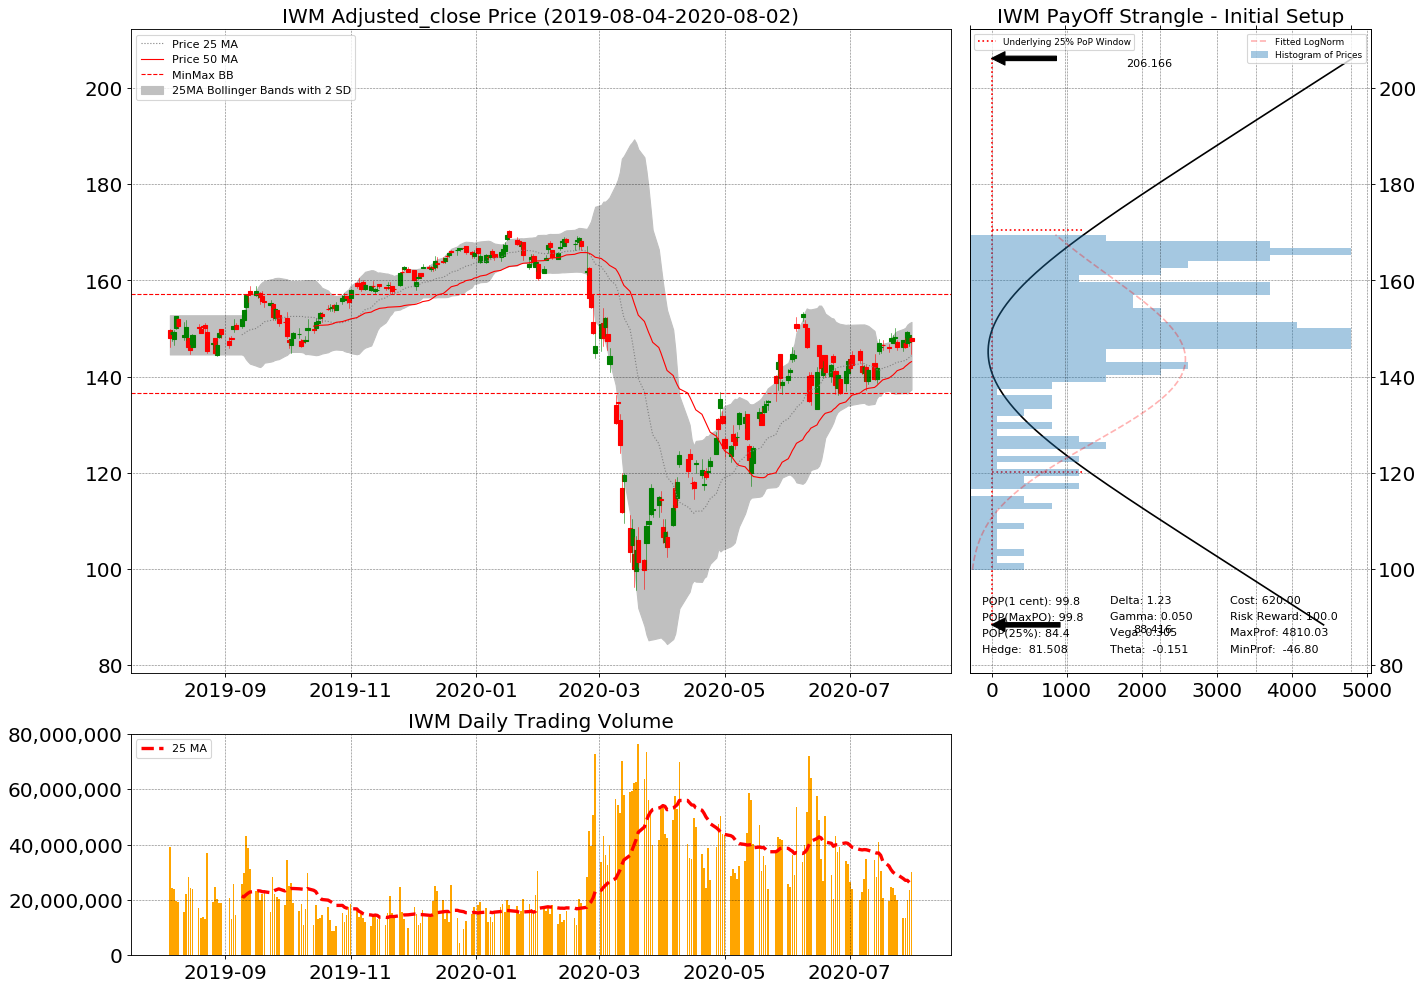

In [21]:
r1=o.Strangle(sLegs,u_price,iRate,desc,0.4,LongShort)
desc='Strangle - Initial Setup'
clear_output(wait=True)
pl1.plotUnderlyingStudy2(symbol, dt_start, dt_end, prices,r1,desc,prb=0.25)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


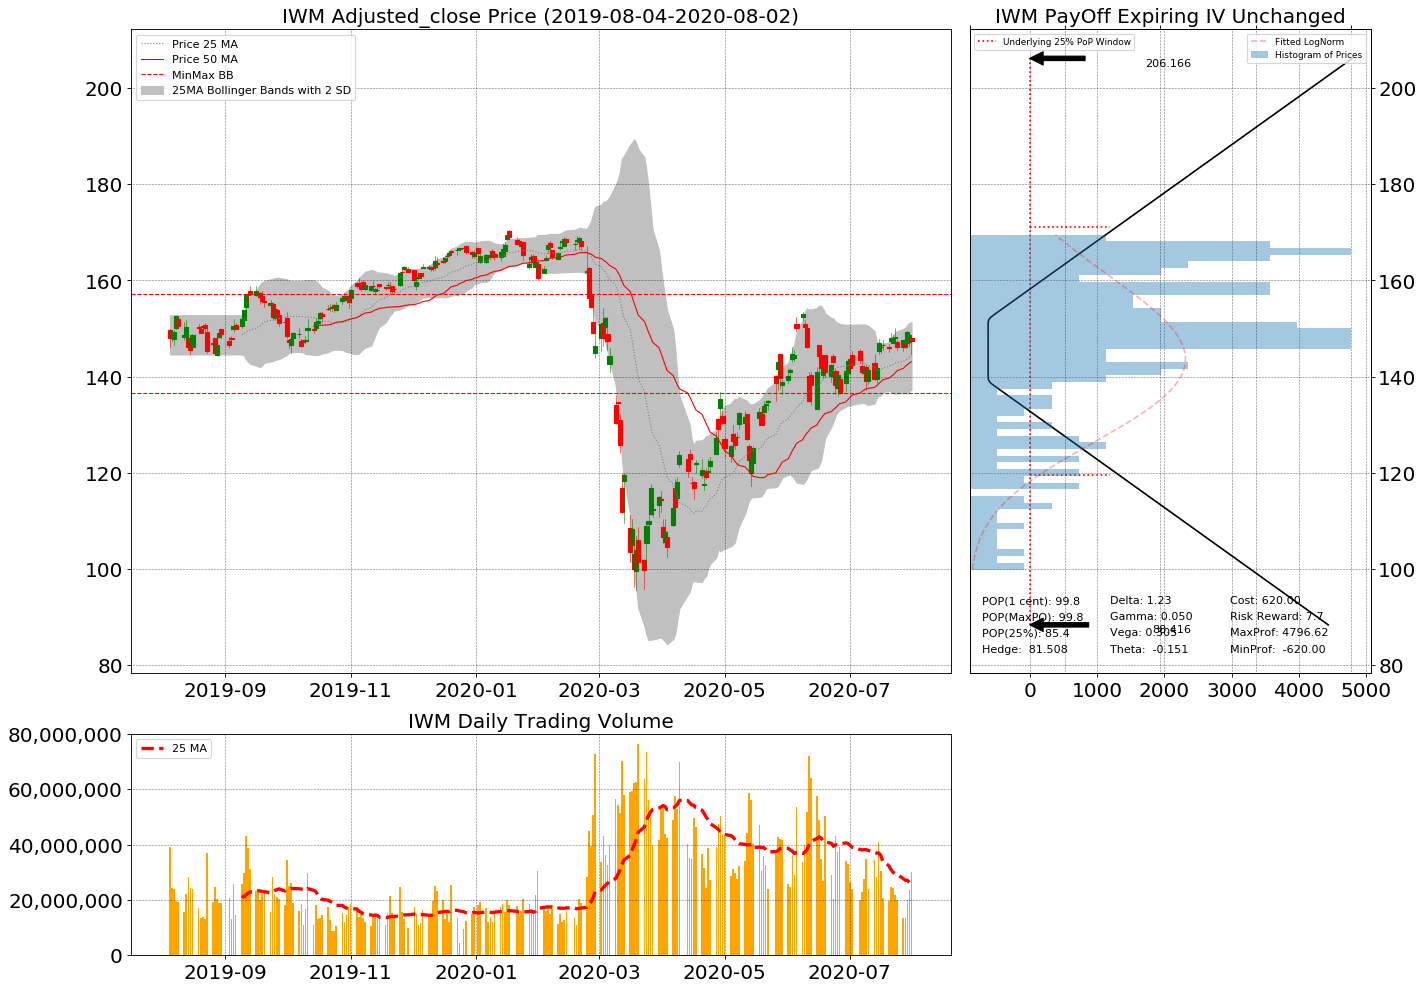

In [22]:
psLegs=sLegs
psLegs[3],psLegs[12]=0.0001,(sLegs[12]-(sLegs[3]-0.0001))

desc='Expiring IV Unchanged'
r2=o.Strangle(psLegs,u_price,iRate,desc,0.4,LongShort)
clear_output(wait=True)
pl1.plotUnderlyingStudy2(symbol, dt_start, dt_end, prices,r2,desc,prb=0.25)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


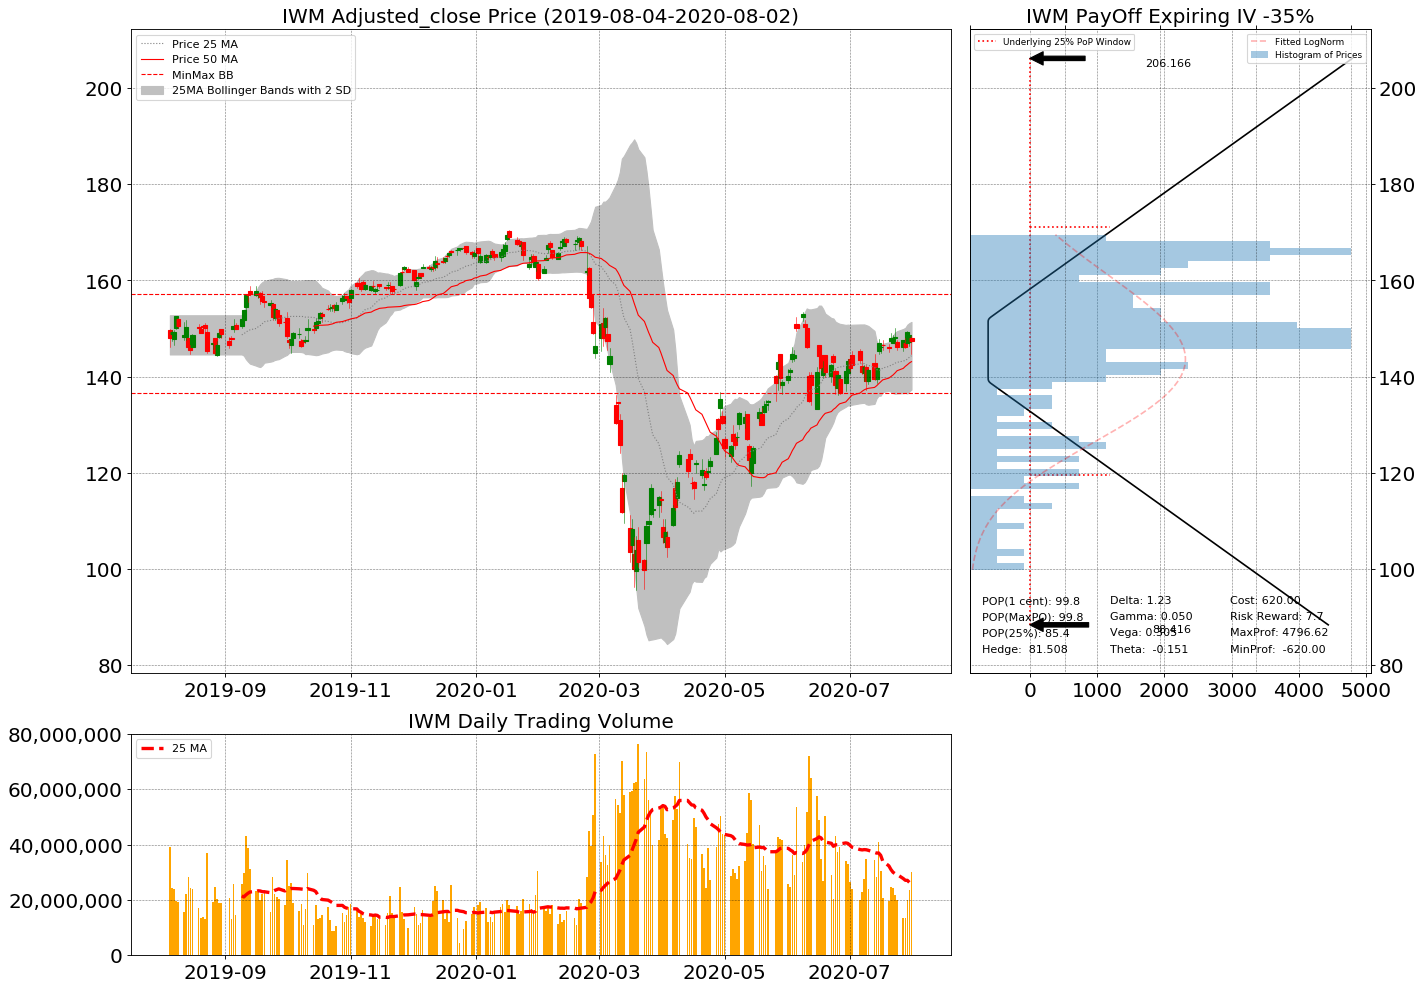

In [23]:
psLegs[2],psLegs[11]=sLegs[2]*(0.65),sLegs[11]*(0.65)

desc='Expiring IV -35%'
r3=o.Strangle(psLegs,u_price,iRate,desc,0.4,LongShort)
clear_output(wait=True)
pl1.plotUnderlyingStudy2(symbol, dt_start, dt_end, prices,r3,desc,prb=0.25)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


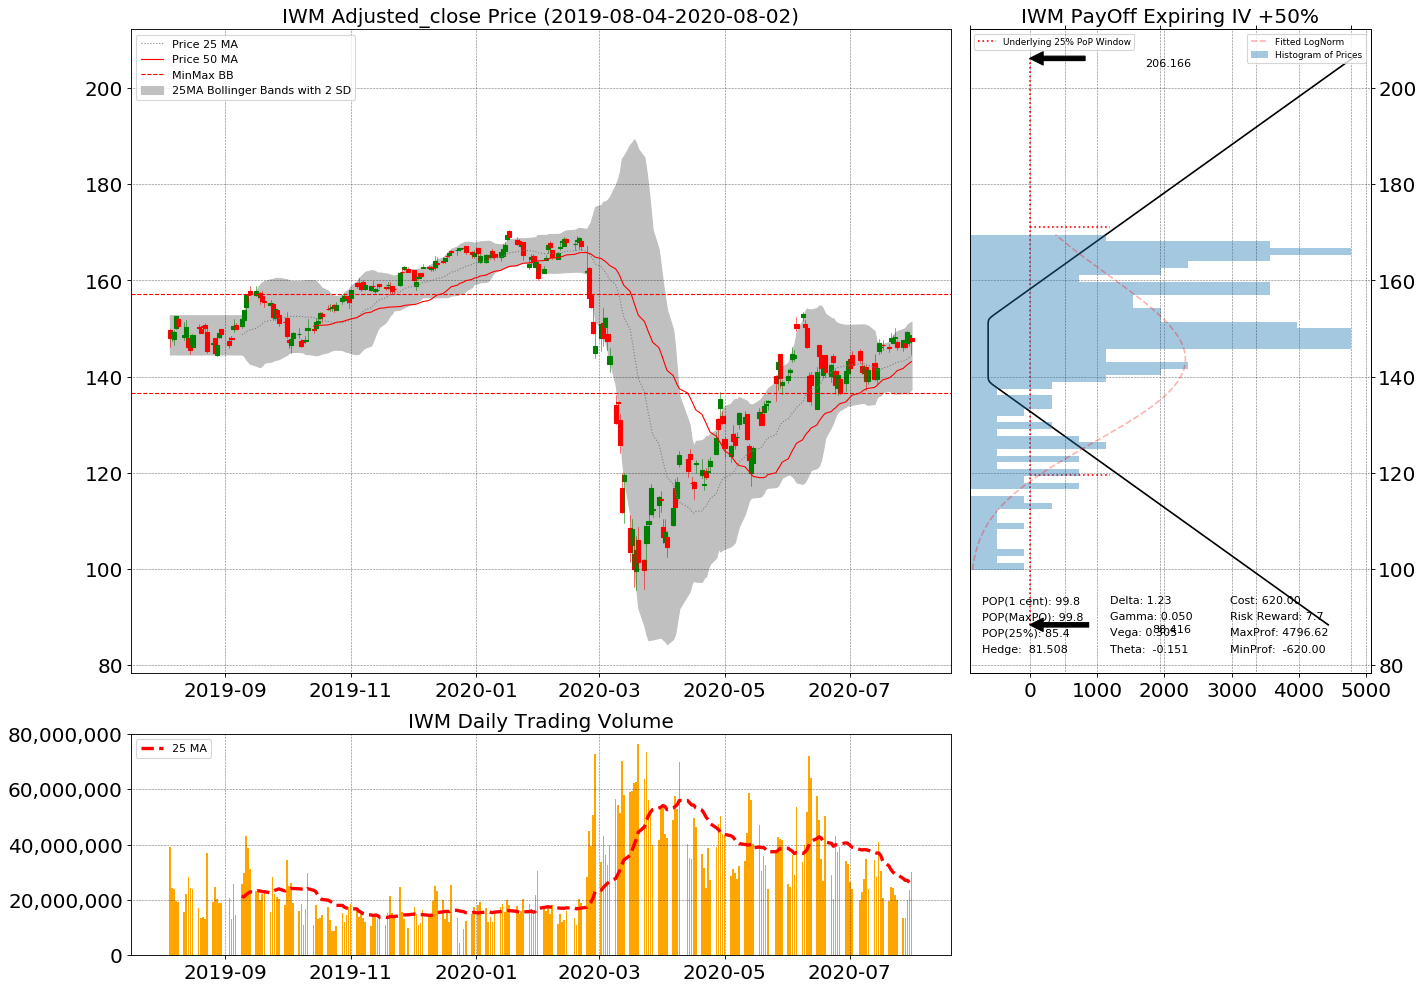

In [24]:
psLegs[2],psLegs[11]=sLegs[2]*(1.5),sLegs[11]*(1.5)

desc='Expiring IV +50%'
r4=o.Strangle(psLegs,u_price,iRate,desc,0.4,LongShort)
clear_output(wait=True)
pl1.plotUnderlyingStudy2(symbol, dt_start, dt_end, prices,r4,desc,prb=0.25)